In [360]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime as dt
!pip install python-docx
from docx import Document
!pip install dataframe_image
import dataframe_image as dfi 

   ---------------------------------------- 0.0/6.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/6.7 MB 991.0 kB/s eta 0:00:07
   ---------------------------------------- 0.1/6.7 MB 1.1 MB/s eta 0:00:06
   - -------------------------------------- 0.2/6.7 MB 1.8 MB/s eta 0:00:04
   - -------------------------------------- 0.2/6.7 MB 1.7 MB/s eta 0:00:04
   - -------------------------------------- 0.2/6.7 MB 1.7 MB/s eta 0:00:04
   - -------------------------------------- 0.3/6.7 MB 1.4 MB/s eta 0:00:05
   - -------------------------------------- 0.3/6.7 MB 1.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.4/6.7 MB 1.2 MB/s eta 0:00:06
   --- ------------------------------------ 0.5/6.7 MB 1.4 MB/s eta 0:00:05
   --- ------------------------------------ 0.5/6.7 MB 1.4 MB/s eta 0:00:05
   --- ------------------------------------ 0.6/6.7 MB 1.4 MB/s eta 0:00:05
   ---- ----------------------------------- 0.7/6.7 MB 1.3 MB/s eta 0:00:05
   ---- ---------

In [297]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-07-29,2024-07-30,68190.01,69947.98,66694.08,66810.03,1.013838e+11,1.351834e+12
1,2024-07-28,2024-07-29,67699.97,68270.69,67070.30,68234.91,1.158465e+11,1.336333e+12
2,2024-07-27,2024-07-28,67865.97,69386.01,66800.05,68045.98,1.023987e+11,1.345116e+12
3,2024-07-26,2024-07-27,65828.01,68200.04,65828.01,67914.02,1.130893e+11,1.325518e+12
4,2024-07-25,2024-07-26,65453.96,66042.03,63509.02,65750.02,1.110903e+11,1.272973e+12


In [299]:
df = df.sort_values(by=['Start'])
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
5126,2010-07-17,2010-07-18,0.0500,0.0500,0.0500,0.0500,0.0,170803.152488
5125,2010-07-18,2010-07-19,0.0858,0.0858,0.0858,0.0858,0.0,294746.595000
5124,2010-07-19,2010-07-20,0.0808,0.0808,0.0808,0.0808,0.0,277570.220000
5123,2010-07-20,2010-07-21,0.0747,0.0747,0.0747,0.0747,0.0,256710.178548
5122,2010-07-21,2010-07-22,0.0792,0.0792,0.0792,0.0792,0.0,274308.375000


In [301]:
df.isnull().sum()

Start         0
End           0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5127 entries, 5126 to 0
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       5127 non-null   object 
 1   End         5127 non-null   object 
 2   Open        5127 non-null   float64
 3   High        5127 non-null   float64
 4   Low         5127 non-null   float64
 5   Close       5127 non-null   float64
 6   Volume      5127 non-null   float64
 7   Market Cap  5127 non-null   float64
dtypes: float64(6), object(2)
memory usage: 360.5+ KB


In [305]:
first_rows = df.head(5)
last_rows = df.tail(5)
empty_rows = 1
empty_data = {col: ['...' for _ in range(empty_rows)] for col in df.columns}
empty_df = pd.DataFrame(empty_data)
combined_df = pd.concat([first_rows, empty_df, last_rows])
combined_df = combined_df.reset_index()
combined_df = combined_df.drop(["index","Market Cap"], axis='columns')
dfi.export(combined_df, 'dataframe.png')

In [307]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,5127.000000,5127.000000,5127.000000,5127.000000,5.127000e+03,5.127000e+03
mean,12147.032825,12424.029045,11857.174855,12161.282065,2.183204e+10,2.292707e+11
std,17820.885585,18217.678975,17402.397001,17839.583484,3.418802e+10,3.435455e+11
min,0.050000,0.050000,0.050000,0.050000,0.000000e+00,1.708032e+05
25%,231.444500,235.688000,228.291500,231.482000,9.134918e+06,3.310398e+09
50%,2744.910000,2862.420000,2671.780000,2752.850000,1.376093e+09,4.529567e+10
75%,18119.732844,18682.766053,17622.604458,18212.000963,3.499467e+10,3.357572e+11
max,73082.350000,73628.430000,71333.360000,73087.950000,2.121515e+11,1.428410e+12


C:\Users\Afeki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Afeki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Afeki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Afeki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

AttributeError: 'DataFrame' object has no attribute 'savefig'

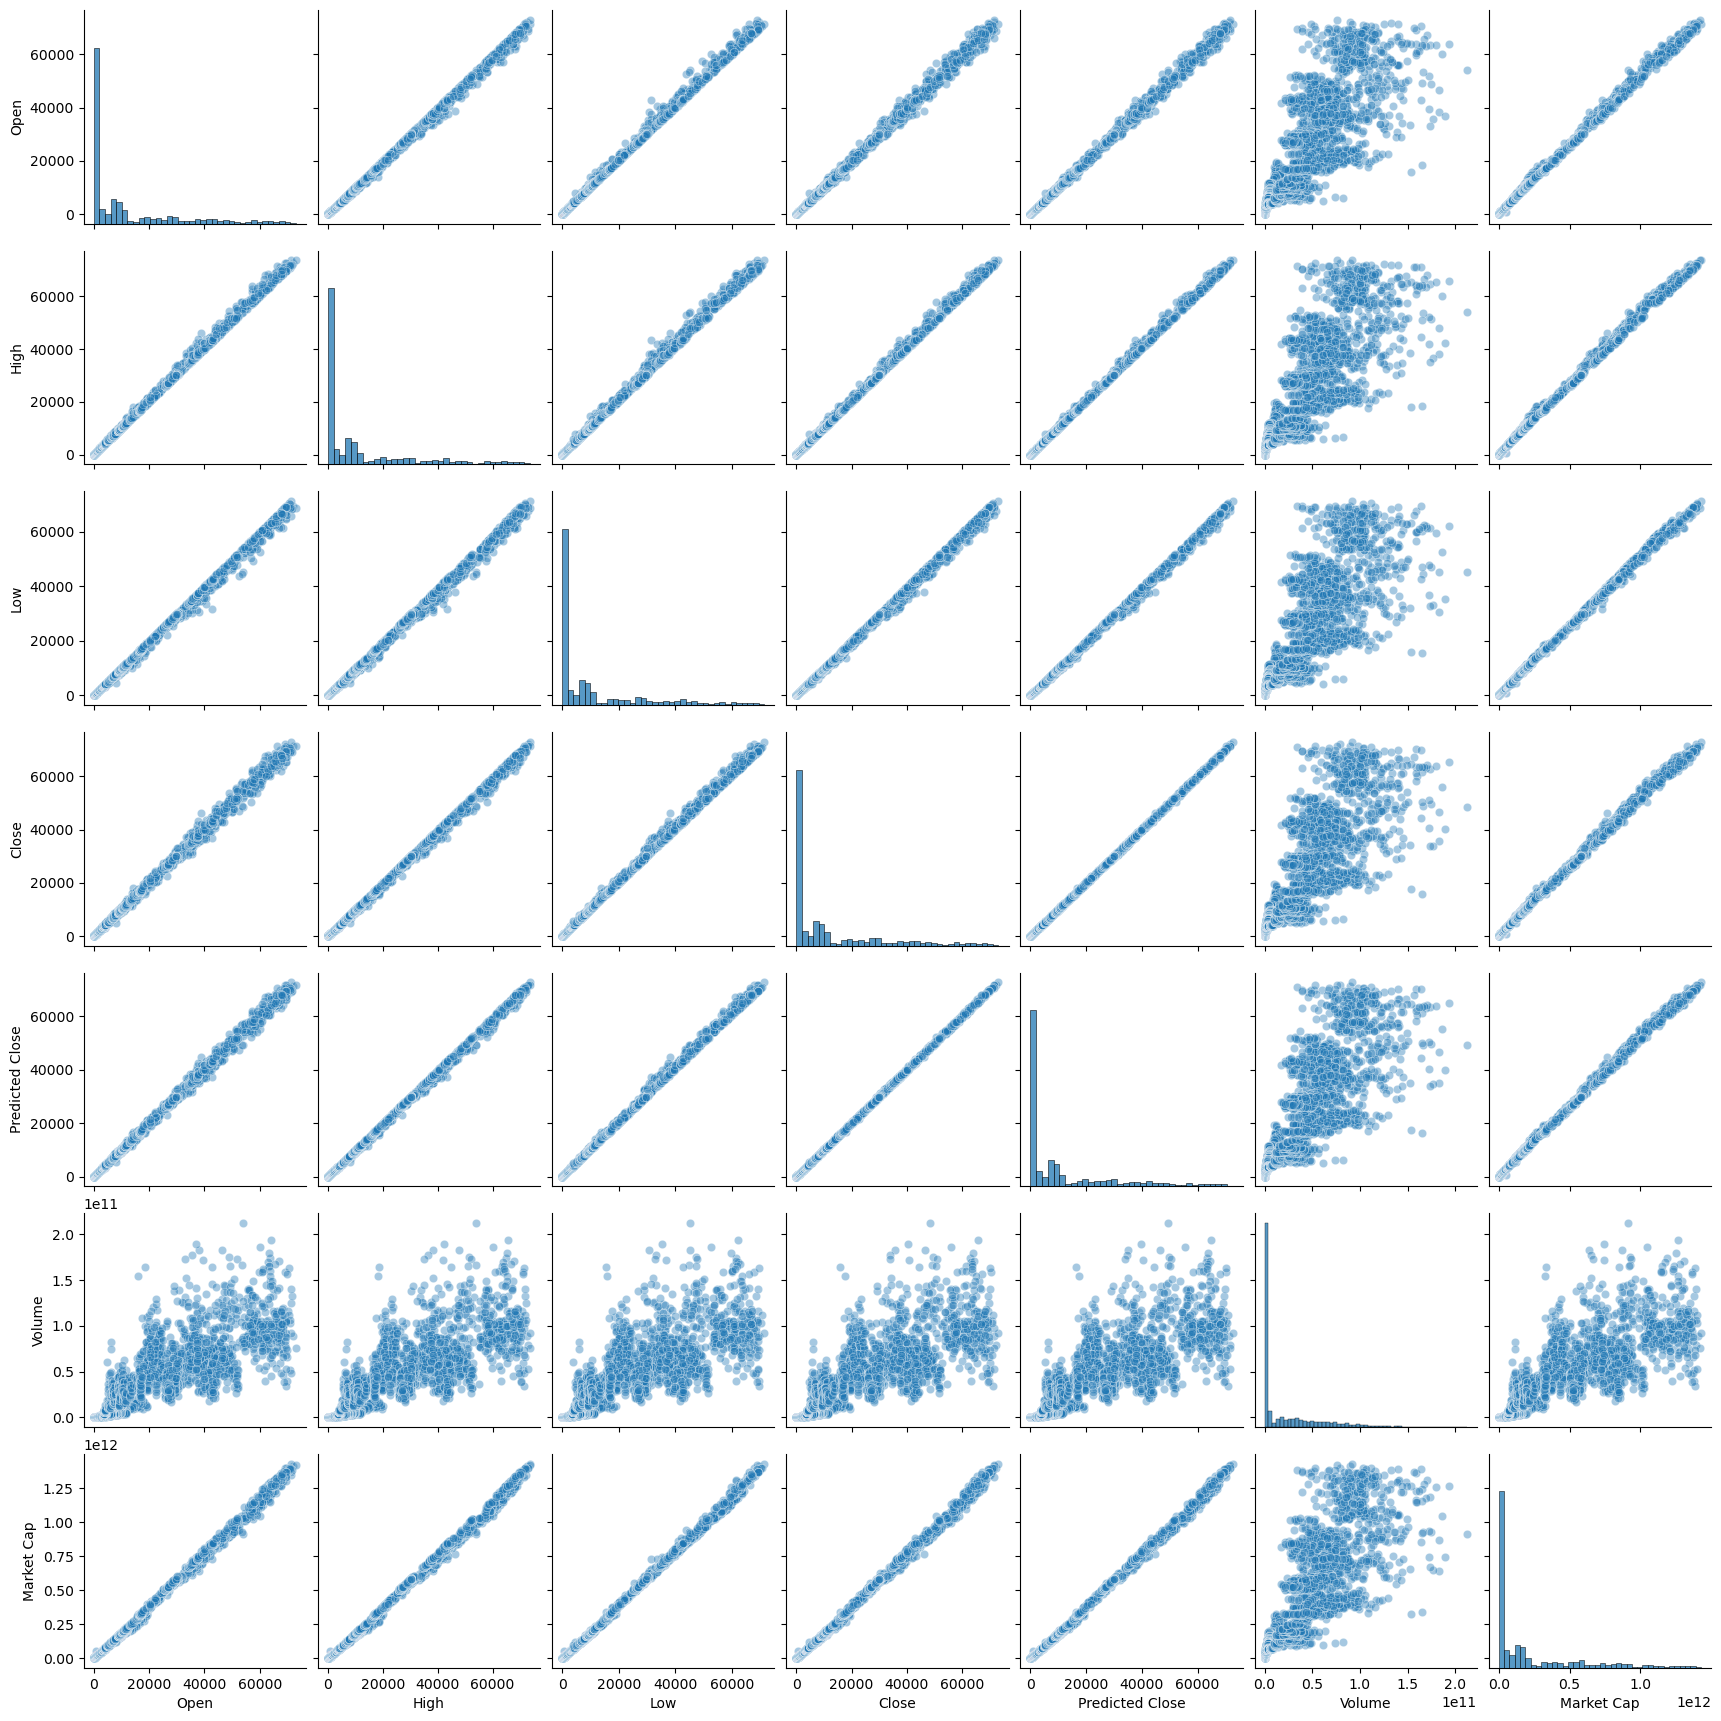

In [273]:
sns.pairplot(df, kind='scatter',plot_kws={'alpha':0.4})
df.savefig('relationship.png')

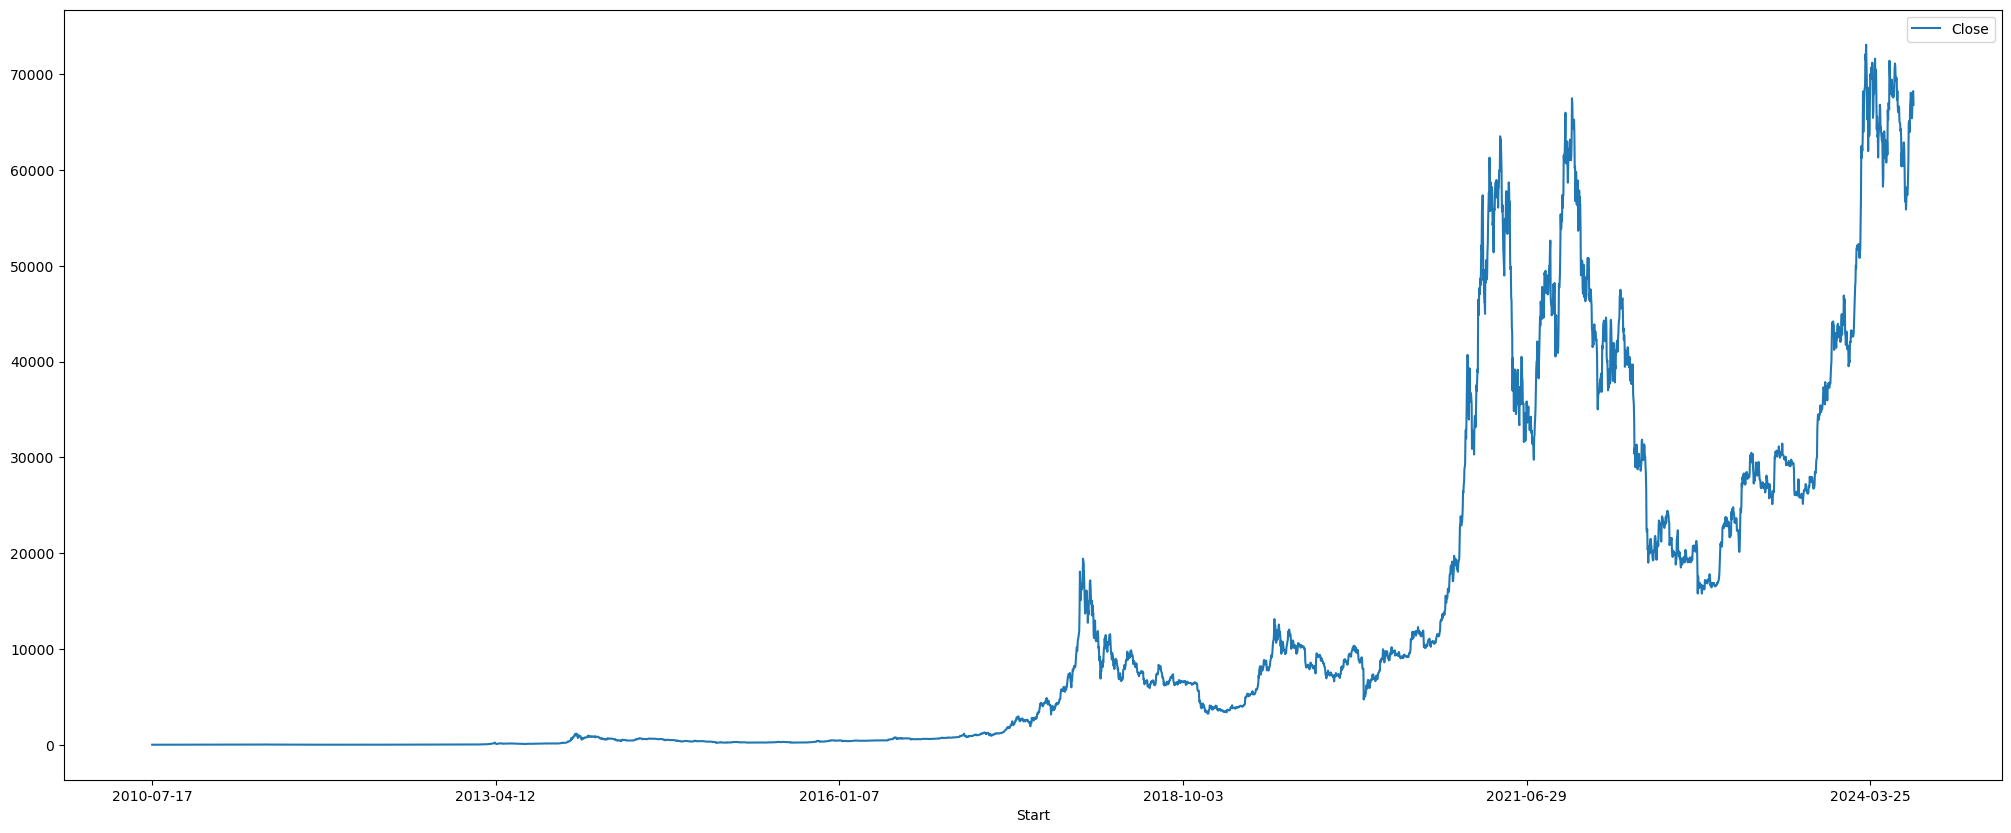

In [309]:
df.plot(x='Start',y='Close', figsize=(25,10))
plt.savefig('close.png')

In [311]:
model = RandomForestRegressor()

In [313]:
x = df[['Open','High','Low','Volume']]
x = x[:int(len(df)-1)]
y = df[['Close']]
y = y[:int(len(df)-1)]
model.fit(x,y)

C:\Users\Afeki\AppData\Local\Temp\ipykernel_9744\3249257944.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y)


RandomForestRegressor()

In [317]:
predictions = model.predict(x)
print("The model score is:", round(model.score(x,y),5))

The model score is: 0.99994


In [319]:
new_data = df[['Open','High','Low','Volume']].tail(1)
prediction = model.predict(new_data)
print('The model predicts the value for the last day is:', prediction)
print('The actual value for the last day is', df[['Close']].tail(1).values[0][0])

The model predicts the value for the last day is: [68000.086964]
The actual value for the last day is 66810.03


In [321]:
X = df[['Open','High','Low','Volume']]
Y = df[['Close']]
close_predictions = model.predict(X)
close_predictions

array([5.04000000e-02, 8.58150000e-02, 8.06620000e-02, ...,
       6.80526092e+04, 6.79999870e+04, 6.80000870e+04])

In [323]:
df.insert(6, "Predicted Close", close_predictions, True)
df.head()

,Start,End,Open,High,Low,Close,Predicted Close,Volume,Market Cap
5126,2010-07-17,2010-07-18,0.0500,0.0500,0.0500,0.0500,0.050400,0.0,170803.152488
5125,2010-07-18,2010-07-19,0.0858,0.0858,0.0858,0.0858,0.085815,0.0,294746.595000
5124,2010-07-19,2010-07-20,0.0808,0.0808,0.0808,0.0808,0.080662,0.0,277570.220000
5123,2010-07-20,2010-07-21,0.0747,0.0747,0.0747,0.0747,0.074371,0.0,256710.178548
5122,2010-07-21,2010-07-22,0.0792,0.0792,0.0792,0.0792,0.079372,0.0,274308.375000


In [327]:
first_rows_1 = df.head(5)
last_rows_1 = df.tail(5)
empty_rows = 1
empty_data = {col: ['...' for _ in range(empty_rows)] for col in df.columns}
empty_df = pd.DataFrame(empty_data)
combined_df_1 = pd.concat([first_rows_1, empty_df, last_rows_1])
combined_df_1 = combined_df_1.reset_index()
combined_df_1 = combined_df_1.drop(["index","Market Cap"], axis='columns')
dfi.export(combined_df_1, 'dataframe1.png')

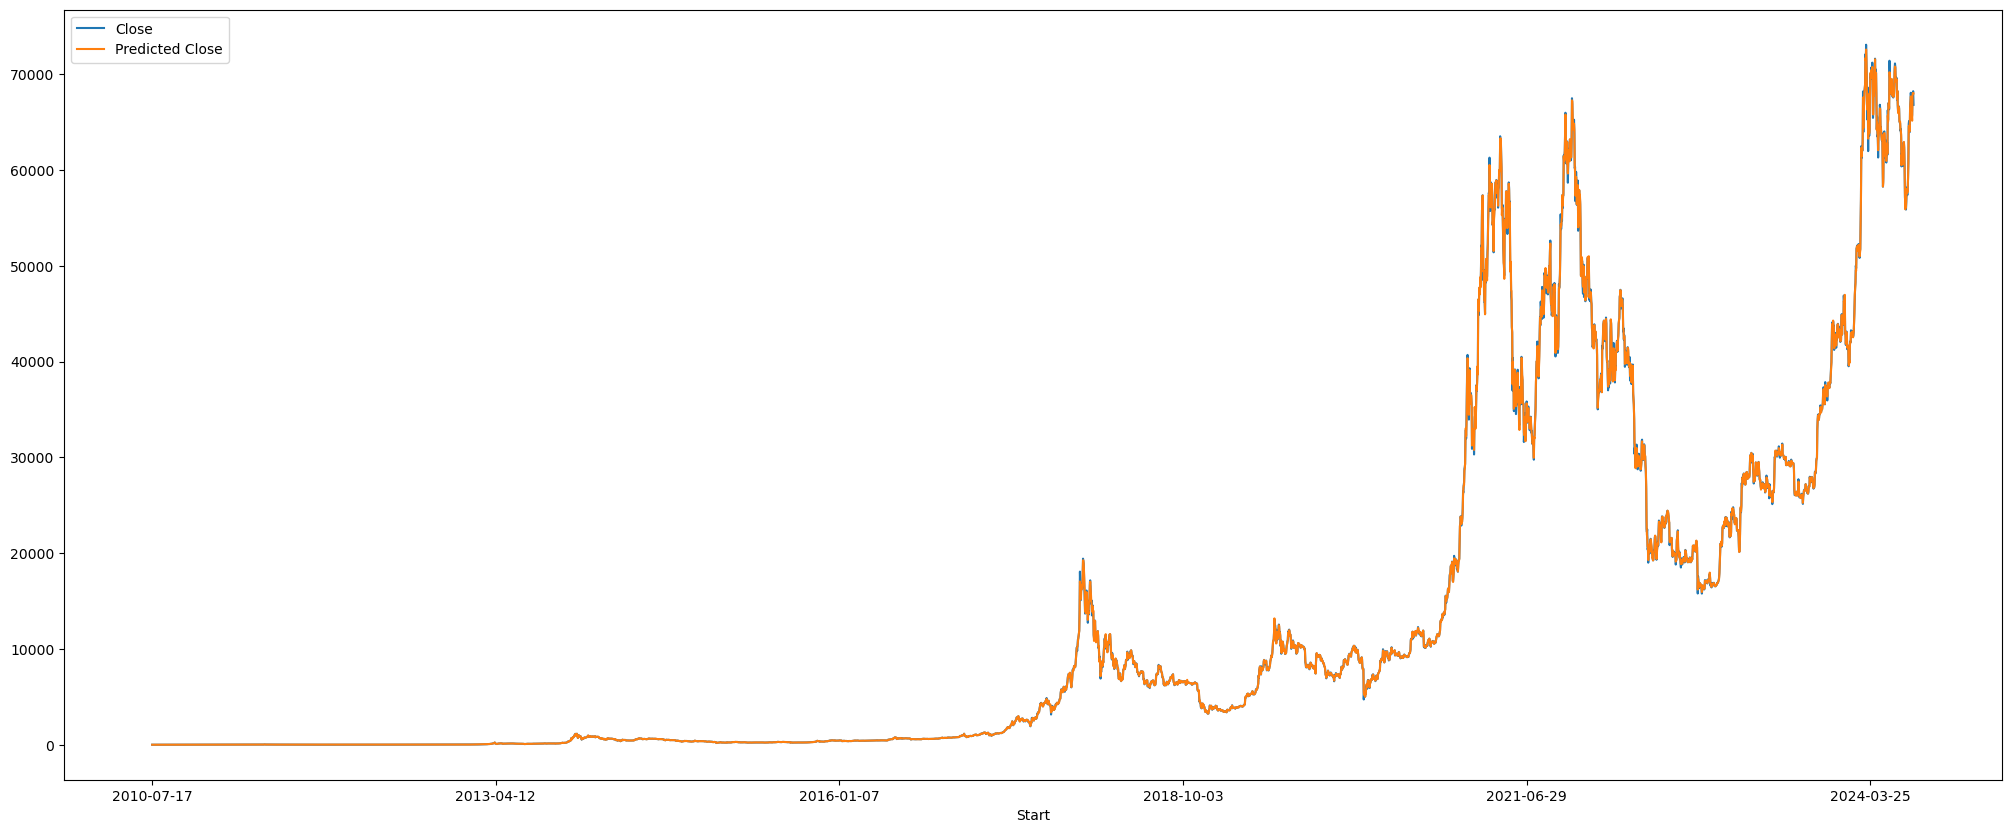

In [329]:
df.plot(x='Start',y=['Close','Predicted Close'], figsize=(25,10))
plt.savefig('predicted close.png')

In [303]:
!pip install fpdf2

     ---------------------------------------- 0.0/58.3 kB ? eta -:--:--
     ------- -------------------------------- 10.2/58.3 kB ? eta -:--:--
     -------------------- ----------------- 30.7/58.3 kB 330.3 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/58.3 kB 375.8 kB/s eta 0:00:01
     -------------------------------------- 58.3/58.3 kB 343.2 kB/s eta 0:00:00
     ---------------------------------------- 0.0/165.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/165.9 kB 991.0 kB/s eta 0:00:01
     -------------------------------------  163.8/165.9 kB 2.5 MB/s eta 0:00:01
     -------------------------------------- 165.9/165.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/206.4 kB ? eta -:--:--
   ----------------------- ---------------- 122.9/206.4 kB 7.0 MB/s eta 0:00:01
   ----------------------- ---------------- 122.9/206.4 kB 7.0 MB/s eta 0:00:01
   ----------------------- ---------------- 122.9/206.4 kB 7.0 MB/s eta

In [333]:
from fpdf import FPDF

pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)

pdf.cell(40,10, 'Bitcoin Prediction Model Report')
pdf.ln(20)

pdf.write(8,'Bitcoin Trading Data')
pdf.image('dataframe.png', x=10,y=45,w=180,h=80)
pdf.ln(100)

pdf.write(8,'Bitcoin Growth Over Time')
pdf.image('close.png', x=1,y=140,w=200,h=120)
pdf.ln(140)

pdf.write(8,'After using the random forest regressor to combine multiple decision trees to create one model, the prediction score for this model is 0.99994.' + '\n' + 'When a model has a prediction score of 1, it is considered perfect.' )
pdf.ln(20)

pdf.write(8,'Bitcoin Trading Data including Predictions')
pdf.image('dataframe1.png', x=10,y=70,w=180,h=80)
pdf.ln(100)

pdf.write(8,'Bitcoin Growth Over Time with Predictions')
pdf.image('predicted close.png', x=1,y=160,w=200,h=120)
pdf.ln(120)

pdf.write(8,'Our predictive model for Bitcoin has surpassed expectations, achieving an extraordinary accuracy score of 0.99994. This near-perfect alignment with observed data underscores its reliability and robustness.')
pdf.ln(15)

pdf.write(8, "While celebrating this remarkable accuracy, it is essential to remain vigilant. Continuous monitoring and validation are crucial to ensure consistent performance across varying market conditions. Additionally, consider stress-testing the model to assess its resilience during extreme events.")
pdf.ln(15)

pdf.write(8, 'In summary, our model provides invaluable insights for cryptocurrency traders, investors, and decision-makers. Its precision opens doors to informed strategies and risk management. As we refine and enhance its capabilities, we anticipate even greater value in navigating the dynamic world of Bitcoin.')

pdf.output('Bitcoin Prediction Model using Machine Learning in Python.pdf','F')

C:\Users\Afeki\AppData\Local\Temp\ipykernel_9744\382893363.py:5: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  pdf.set_font('Arial', 'B', 16)
C:\Users\Afeki\AppData\Local\Temp\ipykernel_9744\382893363.py:37: DeprecationWarning: "dest" parameter is deprecated since v2.2.0, unused and will soon be removed
  pdf.output('Bitcoin Prediction Model using Machine Learning in Python.pdf','F')
